<h1 style="color:yellow;">Concurrent Data - Machine Learning</h1>

# Load the dataframes

In [ ]:
import numpy as np
import os

# 1. Define the directory where your data is saved
save_dir = os.path.join('data frames', 'main','15 features')

# 2. Load the feature matrices (X)
X_train_processed = np.load(os.path.join(save_dir, 'X_train_processed.npy'))
X_val_processed = np.load(os.path.join(save_dir, 'X_val_scaled.npy'))
X_test_processed = np.load(os.path.join(save_dir, 'X_test_scaled.npy'))

# 3. Load the target vectors (y)
y_train_processed = np.load(os.path.join(save_dir, 'y_resampled.npy'))
y_val_processed = np.load(os.path.join(save_dir, 'y_val.npy'))
y_test_processed = np.load(os.path.join(save_dir, 'y_test.npy'))

# 4. Load the label encoder classes
label_classes = np.load(os.path.join(save_dir, 'label_classes.npy'))

print("All datasets loaded successfully.")


# Arguments

In [6]:
version = 'ML'
model_results= []

# Machine Learning

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB


## Logistic Regression

In [12]:
linear_model = LogisticRegression(solver='saga', max_iter=1000, n_jobs=-1, random_state=42)

start_time = time.time()
linear_model.fit(X_train_processed, y_train_processed)
training_time = time.time() - start_time

start_time = time.time()
y_pred_lr = linear_model.predict(X_val_processed)
prediction_time = time.time() - start_time


/opt/anaconda3/envs/pytorch_env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


Logistic Regression Evaluation:
Accuracy: 0.96197784
Precision: 0.96218303
Recall: 0.96197784
F1 Score: 0.96199302
Training Time: 52.7517 seconds
Prediction Time: 0.0077 seconds
latency per sample: 0.00000006 seconds

Classification Report: 
                precision    recall  f1-score   support

        Benign  0.96428496 0.94964555 0.95690927     47821
     HTTPFlood  0.98095854 0.97416869 0.97755182     14014
     ICMPFlood  0.97600000 1.00000000 0.98785425       122
      SYNFlood  0.98169557 0.99901961 0.99028183      1020
       SYNScan  0.99156328 0.99501992 0.99328859      2008
   SlowrateDoS  0.91545265 0.97560299 0.94457120      7214
TCPConnectScan  0.96844181 0.99746064 0.98273705      1969
      UDPFlood  0.95883299 0.96392147 0.96137049     45789
       UDPScan  0.98302001 0.99447853 0.98871607      1630

      accuracy                      0.96197784    121587
     macro avg  0.96891665 0.98325749 0.97592006    121587
  weighted avg  0.96218303 0.96197784 0.96199302    1

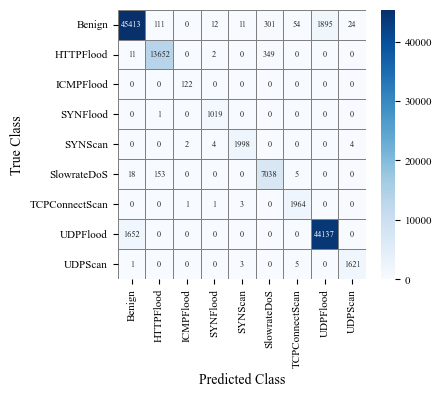

In [13]:
# arguments for evaluation function
results_file_name = 'logistic_regression_results.txt'
cm_title = 'Logistic Regression Confusion Matrix'

print("Logistic Regression Evaluation:")
accuracy, precision, recall, f1 = print_evaluation_metrics(y_val_processed, y_pred_lr, training_time, prediction_time, output_encoder, results_dir, version, results_file_name, cm_title)
log_metrics(model_results, 'logistic_regression', accuracy, precision, recall, f1, training_time, prediction_time)

## Random Forest

In [14]:
rnd_forest = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs = -1)
start_time = time.time()
rnd_forest.fit(X_train_processed, y_train_processed)
training_time = time.time() - start_time

start_time = time.time()
y_pred_rf = rnd_forest.predict(X_val_processed)
prediction_time = time.time() - start_time

# arguments for evaluation function
model_type = 'random_forest'
results_file_name = 'random_forest_results.txt'
cm_title = 'Random Forest Confusion Matrix'

Evaluation:
Accuracy: 0.97915073
Precision: 0.97915085
Recall: 0.97915073
F1 Score: 0.97915070
Training Time: 20.9921 seconds
Prediction Time: 0.0993 seconds
latency per sample: 0.00000082 seconds

Classification Report: 
                precision    recall  f1-score   support

        Benign  0.97449791 0.97406997 0.97428389     47821
     HTTPFlood  0.99743224 0.99785928 0.99764572     14014
     ICMPFlood  1.00000000 1.00000000 1.00000000       122
      SYNFlood  1.00000000 1.00000000 1.00000000      1020
       SYNScan  0.99850374 0.99701195 0.99775729      2008
   SlowrateDoS  0.99583854 0.99514832 0.99549331      7214
TCPConnectScan  0.99898322 0.99796851 0.99847561      1969
      UDPFlood  0.97297474 0.97339972 0.97318719     45789
       UDPScan  0.99571865 0.99877301 0.99724349      1630

      accuracy                      0.97915073    121587
     macro avg  0.99266100 0.99269231 0.99267628    121587
  weighted avg  0.97915085 0.97915073 0.97915070    121587



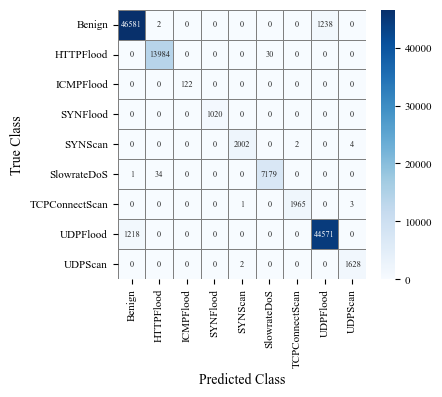

In [15]:
# arguments for evaluation function
results_file_name = 'random_forest_results.txt'
cm_title = 'Random Forest Confusion Matrix'

print("Evaluation:")
accuracy, precision, recall, f1 = print_evaluation_metrics(y_val_processed, y_pred_rf, training_time, prediction_time, output_encoder, results_dir, version, results_file_name, cm_title)
log_metrics(model_results, 'random_forest', accuracy, precision, recall, f1, training_time, prediction_time)

## XGBoost

In [16]:
# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(output_encoder.classes_), eval_metric='mlogloss')

# Train the model
start_time = time.time()
xgb_model.fit(X_train_processed, y_train_processed)
training_time = time.time() - start_time

# Make predictions
start_time = time.time()
y_pred_xgb = xgb_model.predict(X_val_processed)
prediction_time = time.time() - start_time

XGBoost Evaluation:
Accuracy: 0.98197998
Precision: 0.98249168
Recall: 0.98197998
F1 Score: 0.98198082
Training Time: 15.1771 seconds
Prediction Time: 0.1046 seconds
latency per sample: 0.00000086 seconds

Classification Report: 
                precision    recall  f1-score   support

        Benign  0.99574819 0.95987119 0.97748059     47821
     HTTPFlood  0.99764605 0.99800200 0.99782399     14014
     ICMPFlood  1.00000000 1.00000000 1.00000000       122
      SYNFlood  0.99706745 1.00000000 0.99853157      1020
       SYNScan  0.99900000 0.99501992 0.99700599      2008
   SlowrateDoS  0.99611597 0.99542556 0.99577064      7214
TCPConnectScan  0.99847561 0.99796851 0.99822200      1969
      UDPFlood  0.95963040 0.99571950 0.97734191     45789
       UDPScan  0.99511301 0.99938650 0.99724518      1630

      accuracy                      0.98197998    121587
     macro avg  0.99319963 0.99348813 0.99326910    121587
  weighted avg  0.98249168 0.98197998 0.98198082    121587



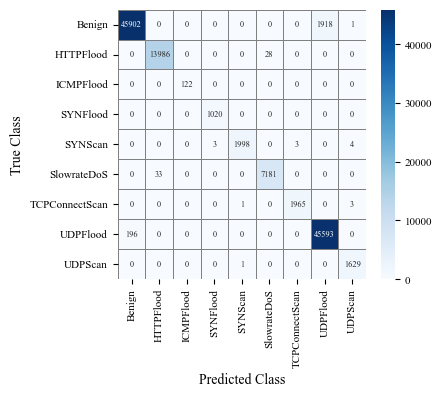

In [17]:
# arguments for evaluation function
results_file_name = 'xgboost_results.txt'
cm_title = 'XGBoost Confusion Matrix'

print("XGBoost Evaluation:")
accuracy, precision, recall, f1 = print_evaluation_metrics(y_val_processed, y_pred_xgb, training_time, prediction_time, output_encoder, results_dir, version, results_file_name, cm_title)
log_metrics(model_results, 'xgboost', accuracy, precision, recall, f1, training_time, prediction_time)

## Naive Bayes

In [18]:
# Create a Naive Bayes classifier
nb_model = GaussianNB()

# Train the model
start_time = time.time()
nb_model.fit(X_train_processed, y_train_processed)
training_time = time.time() - start_time

# Make predictions
start_time = time.time()
y_pred_nb = nb_model.predict(X_val_processed)
prediction_time = time.time() - start_time

Naive Bayes Evaluation:
Accuracy: 0.68406162
Precision: 0.82157299
Recall: 0.68406162
F1 Score: 0.64756653
Training Time: 0.2346 seconds
Prediction Time: 0.0163 seconds
latency per sample: 0.00000013 seconds

Classification Report: 
                precision    recall  f1-score   support

        Benign  0.99290389 0.26333619 0.41627000     47821
     HTTPFlood  0.95749497 0.81497074 0.88050266     14014
     ICMPFlood  1.00000000 1.00000000 1.00000000       122
      SYNFlood  1.00000000 0.98823529 0.99408284      1020
       SYNScan  1.00000000 0.99352590 0.99675244      2008
   SlowrateDoS  0.71975481 0.92777932 0.81063405      7214
TCPConnectScan  1.00000000 0.98730320 0.99361104      1969
      UDPFlood  0.61982565 1.00000000 0.76529922     45789
       UDPScan  0.18410808 0.98650307 0.31030490      1630

      accuracy                      0.68406162    121587
     macro avg  0.83045416 0.88462819 0.79638413    121587
  weighted avg  0.82157299 0.68406162 0.64756653    121587



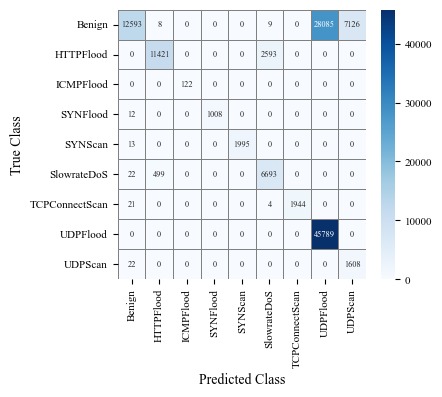

In [19]:
# arguments for evaluation function
results_file_name = 'naive_bayes_results.txt'
cm_title = 'Naive Bayes Confusion Matrix'

print("Naive Bayes Evaluation:")
accuracy, precision, recall, f1 = print_evaluation_metrics(y_val_processed, y_pred_nb, training_time, prediction_time, output_encoder, results_dir, version, results_file_name, cm_title)
log_metrics(model_results, 'naive_bayes', accuracy, precision, recall, f1, training_time, prediction_time)

## SVM

In [20]:
LSVC = LinearSVC(dual=False, random_state=42)

### Use One-vs-Rest classifier

In [21]:
ovr_classifier = OneVsRestClassifier(estimator=LSVC, n_jobs=-1)
start_time = time.time()
ovr_classifier.fit(X_train_processed, y_train_processed)
training_time = time.time() - start_time

start_time = time.time()
y_pred_svm = ovr_classifier.predict(X_val_processed)
prediction_time = time.time() - start_time

SVM Evaluation:
Accuracy: 0.95392600
Precision: 0.95537936
Recall: 0.95392600
F1 Score: 0.95419777
Training Time: 32.5520 seconds
Prediction Time: 0.0182 seconds
latency per sample: 0.00000015 seconds

Classification Report: 
                precision    recall  f1-score   support

        Benign  0.96355598 0.93879258 0.95101310     47821
     HTTPFlood  0.97822409 0.94883688 0.96330641     14014
     ICMPFlood  0.97600000 1.00000000 0.98785425       122
      SYNFlood  0.98169557 0.99901961 0.99028183      1020
       SYNScan  0.98944724 0.98057769 0.98499250      2008
   SlowrateDoS  0.84715840 0.97116717 0.90493413      7214
TCPConnectScan  0.83753741 0.99492128 0.90947075      1969
      UDPFlood  0.95970409 0.96328813 0.96149277     45789
       UDPScan  0.95892857 0.98834356 0.97341390      1630

      accuracy                      0.95392600    121587
     macro avg  0.94358348 0.97610521 0.95852885    121587
  weighted avg  0.95537936 0.95392600 0.95419777    121587



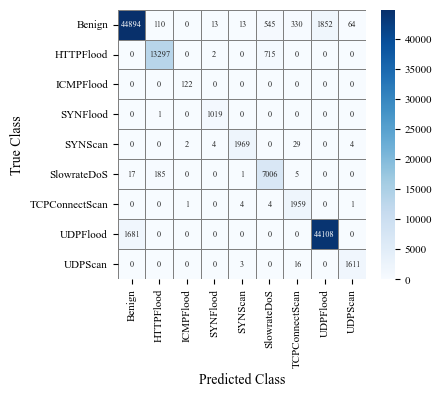

In [22]:
# arguments for evaluation function
results_file_name = 'svm_results.txt'
cm_title = 'Support Vector Machine Confusion Matrix'

print("SVM Evaluation:")
accuracy, precision, recall, f1 = print_evaluation_metrics(y_val_processed, y_pred_svm, training_time, prediction_time, output_encoder, results_dir, version, results_file_name, cm_title)
log_metrics(model_results, 'svm', accuracy, precision, recall, f1, training_time, prediction_time)

# Bar charts

Saved ML_comparison_accuracy.pdf


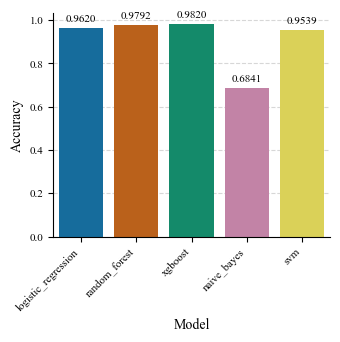

Saved ML_comparison_precision.pdf


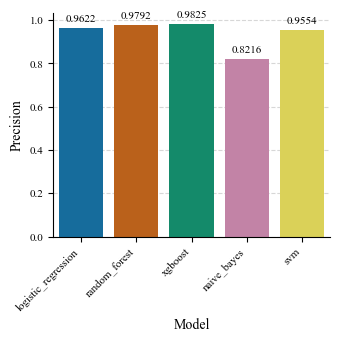

Saved ML_comparison_recall.pdf


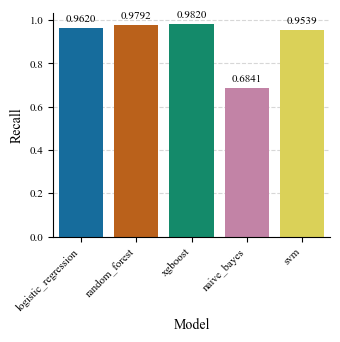

Saved ML_comparison_f1-score.pdf


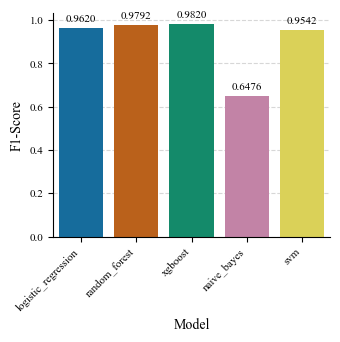

Saved ML_comparison_training_time_s.pdf


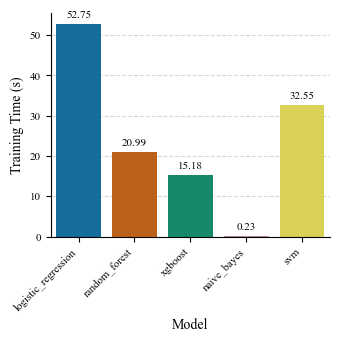

Saved ML_comparison_prediction_time_s.pdf


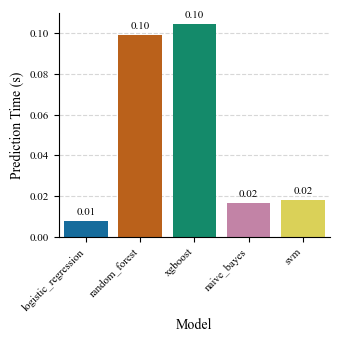

In [23]:
plot_individual_metrics(model_results, evaluation_dir, version)